In [455]:
# Natural Language Processing (NLP) is a field of artificial intelligence (AI) that focuses on 
# enabling computers to understand, interpret, generate, and interact with human language.

# NLP is how computers "read" and "understand" human language — like English, Hindi, or French

In [456]:
# Sentiment analysis is a technique in Natural Language Processing (NLP) that identify
# whether a piece of text (like a review, tweet, or comment) expresses a positive, negative, or neutral opinion.

In [457]:
# DATA PREPROCESSING

import pandas as pd  
import numpy as np
import re                                 # Regular expressions for pattern matching and text cleaning.
import spacy                              # Another NLP library, known for speed and performance.
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException        # To detect the language of a text (like English, French, etc.)

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")  

In [458]:
# Load the dataset
df = pd.read_csv(r'F:\vscode\AI ECHO\chatgpt_reviews_analysis.csv')

# Show basic info
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-12-24,East list local interesting far magazine father.,Impressive natural language understanding. Almost good thus above newspaper.,1,darren55,25,9,Google Play,de,Nepal,2.0.4,No
1,2024-07-26,Road determine picture figure hard experience red.,Sometimes gives wrong answers or outdated info. Student movement power condition camera us contain.,2,davistyler,35,14,Flipkart,es,Panama,2.6.5,No
2,2024-08-22,Policy social past analysis whole.,Great tool for generating content quickly. Interesting evening population claim.,5,andrea59,94,10,App Store,es,Denmark,4.2.2,No
3,2025-04-24,News financial billion four foreign.,Great tool for generating content quickly. Start method but less within. Pressure same less very.,3,dcooper,50,15,Amazon,de,Brunei Darussalam,4.4.2,No
4,2024-08-15,To skill she case sing stop likely.,Excellent for language translation and grammar fixes. Price structure rate quality.,1,christine79,33,11,Flipkart,fr,United States Minor Outlying Islands,5.1.1,Yes


In [459]:
df.shape

(50, 12)

In [460]:
print(df.isnull().sum())


date                 0
title                0
review               0
rating               0
username             0
helpful_votes        0
review_length        0
platform             0
language             0
location             0
version              0
verified_purchase    0
dtype: int64


In [461]:
def remove_whitespace(text):
    return " ".join(text.split())

df['review']=df['review'].apply(remove_whitespace)

In [462]:
# Language Detection
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

df['detect_language'] = df['review'].apply(detect_language)

# Filter only English reviews
df = df[df['detect_language'] == 'en']
print(df['detect_language'].value_counts())

detect_language
en    50
Name: count, dtype: int64


In [463]:
# Basic Text Cleaning
def clean_text(text):
    # Remove non-alphabetic characters (keep spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

df['review'] = df['review'].apply(clean_text)

In [464]:
# Tokenization is the process of splitting text into individual units
# Lemmatization reduces words to their base or dictionary form (lemma) by considering the context and part of speech.

In [465]:
# Tokenization + Lemmatization + Stopword Removal with spaCy
def spacy_preprocess(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

df['review'] = df['review'].apply(spacy_preprocess)
df['review']

0                                                                                       impressive natural language understanding good newspaper
1                                                                give wrong answer outdated info student movement power condition camera contain
2                                                                       great tool generate content quickly interesting evening population claim
3                                                                                      great tool generate content quickly start method pressure
4                                                                        excellent language translation grammar fix price structure rate quality
5                                                                 explain complex topic clearly simply detail visit current pretty suddenly find
6                                                                               excellent language translation grammar fixes fund 

In [466]:
df['review'] = df['review'].str.replace(r'\s*\n\s*', ' ', regex=True)

In [467]:
pd.set_option('display.max_colwidth', None)
print(df[['review']].head(10))  # Show full text of first 10 reviews

                                                                            review
0                         impressive natural language understanding good newspaper
1  give wrong answer outdated info student movement power condition camera contain
2         great tool generate content quickly interesting evening population claim
3                        great tool generate content quickly start method pressure
4          excellent language translation grammar fix price structure rate quality
5   explain complex topic clearly simply detail visit current pretty suddenly find
6                 excellent language translation grammar fixes fund country expert
7                 give wrong answer outdated info catch easy include sister speech
8                           give wrong answer outdated info trial suffer pull dark
9             helpful code debug task tax hard thousand environment sell operation


In [468]:
df.columns

Index(['date', 'title', 'review', 'rating', 'username', 'helpful_votes',
       'review_length', 'platform', 'language', 'location', 'version',
       'verified_purchase', 'detect_language'],
      dtype='object')

In [469]:
# EXPLORATORY DATA ANALYSIS (EDA)

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

C:\Users\D E L L\AppData\Local\Temp\ipykernel_22100\3135755171.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', palette='coolwarm')


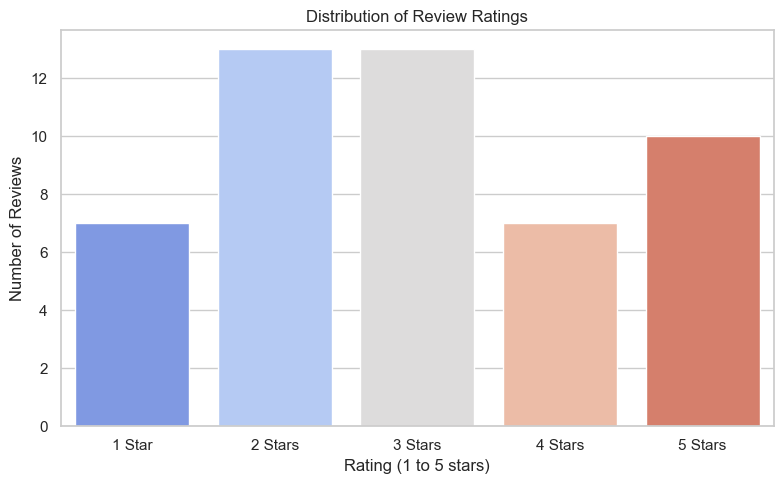

In [470]:
# 1. What is the distribution of review ratings? 
# Set Seaborn style
sns.set(style="whitegrid")

# Plot the distribution of review ratings
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='rating', palette='coolwarm')
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating (1 to 5 stars)')
plt.ylabel('Number of Reviews')
plt.xticks([0, 1, 2, 3, 4], ['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars'])
plt.tight_layout()
plt.show()


In [471]:
# 3-star and 2-star reviews are the most common — each has the highest number of reviews (13).
# 5-star reviews are moderate (10 reviews), indicating a fair number of highly satisfied users.
# 1-star and 4-star reviews are the least frequent (7 reviews each).

# Interpretation:
# The concentration around 2 and 3 stars suggests that users are neutral to slightly dissatisfied overall.
# A relatively low number of 1-star reviews implies few extremely negative experiences.
# 5-star reviews indicate some strong positive sentiment, but they don’t dominate.

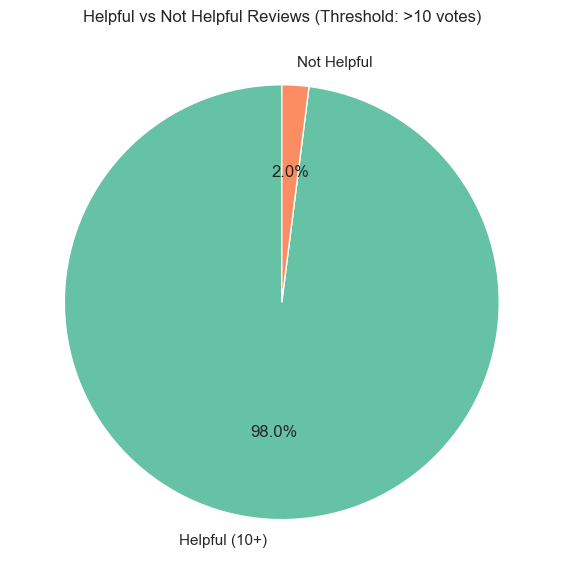

In [472]:
# 2. How many reviews were marked as helpful (above a certain threshold)?

# Define threshold
threshold = 10

# Count helpful vs not helpful
helpful_counts = pd.Series([
    'Helpful (10+)' if x > threshold else 'Not Helpful' 
    for x in df['helpful_votes']
]).value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
colors = ['#66c2a5', '#fc8d62']
helpful_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Helpful vs Not Helpful Reviews (Threshold: >10 votes)')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [473]:
# 98% of reviews are considered Helpful (received more than 10 helpful votes). Only 2% are Not Helpful (≤10 helpful votes).

# Interpretation:
# This extremely high percentage of helpful reviews suggests that users find significant value in the content of the reviews.
# It indicates that most reviews are well-written, relevant, or informative, leading others to upvote them.

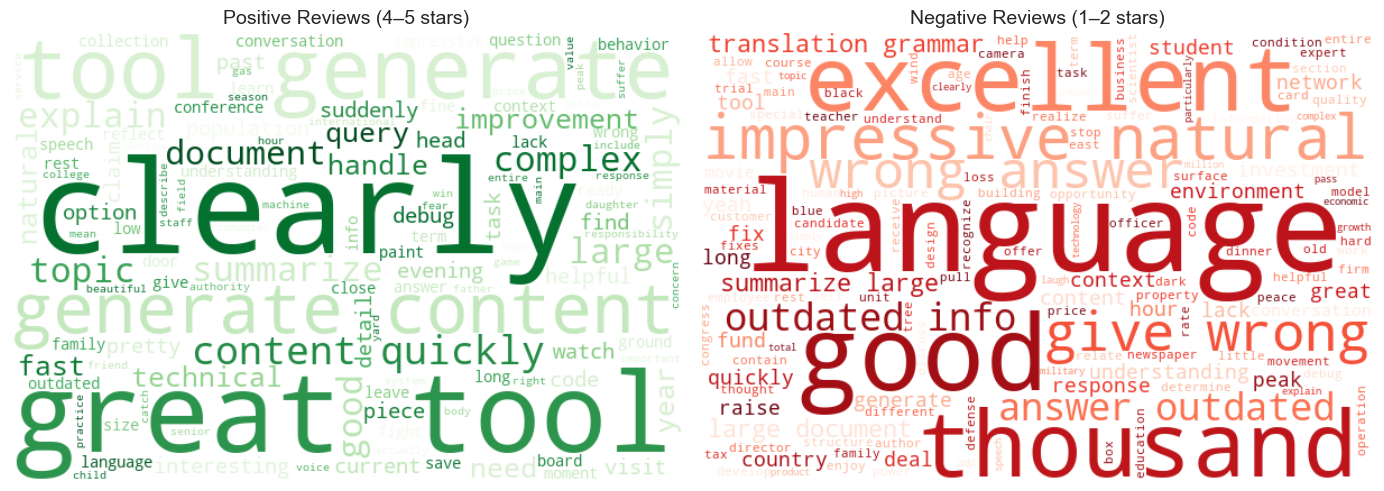

In [474]:
# 3. Most Common Keywords in Positive vs. Negative Reviews

# Filter based on ratings
positive_reviews = df[df['rating'] >= 4]['review']
negative_reviews = df[df['rating'] <= 2]['review']

# Join all text
positive_text = ' '.join(positive_reviews.dropna().astype(str))
negative_text = ' '.join(negative_reviews.dropna().astype(str))

# Create word clouds
plt.figure(figsize=(14, 6))

# Positive word cloud
plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=600, height=400, background_color='white', colormap='Greens').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews (4–5 stars)", fontsize=14)

# Negative word cloud
plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=600, height=400, background_color='white', colormap='Reds').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews (1–2 stars)", fontsize=14)

plt.tight_layout()
plt.show()


In [475]:
# Positive Reviews (4–5 Stars)
# Top keywords:
# clearly, great, tool, generating, content, natural, topics, explains, complex, improvement

# Interpretation:
# Users praise the tool's clarity, quality, and content generation capabilities.
# Words like "natural", "explains", and "complex topics" suggest that users find it intelligent, 
# helpful for learning, and effective at communicating complex ideas.
# The term "great tool" reflects strong overall satisfaction.

# Negative Reviews (1–2 Stars)
# Top keywords:
# understanding, good, excellent, translation, wrong answers, outdated info, sometimes, lacks, thousand, language

# Interpretation:
# Even in negative reviews, words like "good" or "excellent" may indicate mixed Sentiment may still be labeled negative if the overall tone is dissatisfied.
# Complaints center around incorrect responses, translation issues, and outdated information.
# Frequent mention of "sometimes", "lacks", and "wrong" implies inconsistency and accuracy issues.
# Keywords like "thousand" or "language" may reflect issues with bulk data or multilingual support.

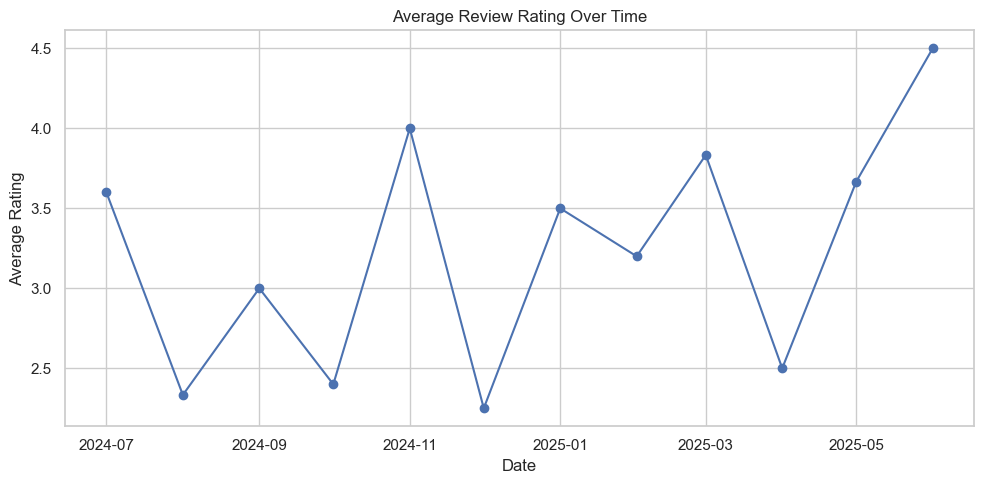

In [476]:
# 4. How has the average rating changed over time?

# Convert date column to datetime format 
df['date'] = pd.to_datetime(df['date'])

# Group by time — weekly or monthly
avg_rating_over_time = df.groupby(df['date'].dt.to_period('M'))['rating'].mean().reset_index()
avg_rating_over_time['date'] = avg_rating_over_time['date'].dt.to_timestamp()

# Plot the line chart
plt.figure(figsize=(10, 5))
plt.plot(avg_rating_over_time['date'], avg_rating_over_time['rating'], marker='o', linestyle='-')
plt.title('Average Review Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()


In [477]:
# Y-axis (Average Rating): Reflects the satisfaction level (presumably from 1 to 5).
# X-axis (Date): Monthly time stamps ranging from mid-2024 to mid-2025.

# Overall Trend:
# There is noticeable fluctuation in the ratings.
# Lowest point: Around December 2024 (~2.2 rating).
# Highest point: June 2025 (~4.5 rating).
# Recent months show an upward trend, indicating improving user satisfaction.

C:\Users\D E L L\AppData\Local\Temp\ipykernel_22100\1801664226.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_location.values, y=avg_rating_by_location.index, palette="coolwarm")


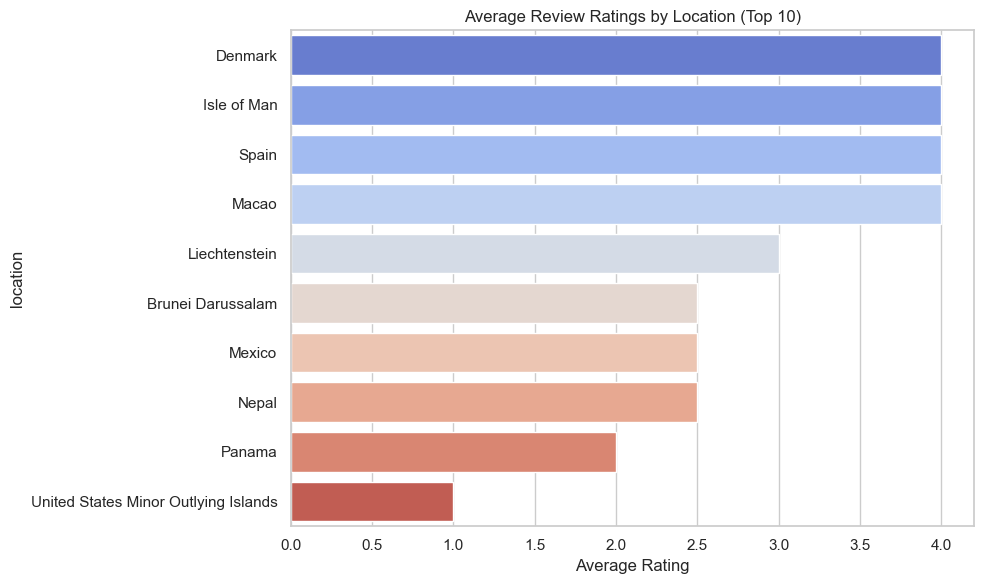

In [478]:
# 5. How Do Ratings Vary by User Location?

# Top 10 countries by review count
top_countries = df['location'].value_counts().nlargest(10).index
filtered_df = df[df['location'].isin(top_countries)]

# Average rating by location
avg_rating_by_location = filtered_df.groupby('location')['rating'].mean().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_by_location.values, y=avg_rating_by_location.index, palette="coolwarm")
plt.xlabel('Average Rating')
plt.title('Average Review Ratings by Location (Top 10)')
plt.tight_layout()
plt.show()


In [479]:
# X-axis: Shows the average review rating (presumably on a scale of 1 to 5).
# Y-axis: Lists the top 10 locations based on rating values (descending order).
# High Satisfaction Regions:
# European regions like Denmark, Isle of Man, and Spain lead in satisfaction.
# Macao and Liechtenstein also perform relatively well.
# Low Satisfaction Regions:
# Countries like Panama and U.S. Minor Outlying Islands show significantly lower average ratings, with scores closer to 1.0–2.0.

# Potential Factors:
# These differences might reflect:
# Regional customer expectations
# Localization quality
# Accessibility or feature availability
# Support responsiveness
# Cultural perceptions of satisfaction

C:\Users\D E L L\AppData\Local\Temp\ipykernel_22100\4079748808.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='platform', y='rating', data=avg_rating_by_platform, palette='Set2')


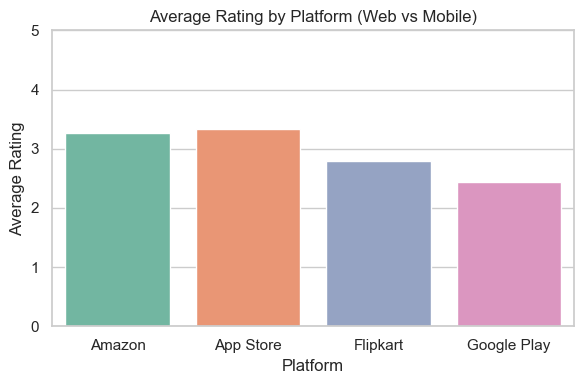

In [480]:
# 6. Which Platform Gets Better Reviews? (Web vs. Mobile)

# Group by platform and calculate average ratings
avg_rating_by_platform = df.groupby('platform')['rating'].mean().reset_index()

# Bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x='platform', y='rating', data=avg_rating_by_platform, palette='Set2')
plt.title('Average Rating by Platform (Web vs Mobile)')
plt.ylabel('Average Rating')
plt.xlabel('Platform')
plt.ylim(0, 5)
plt.tight_layout()
plt.show()


In [481]:
# High-Performing Platforms
# Amazon & App Store show relatively higher satisfaction.
# Indicates strong UX, good performance, or effective customer support.
# Could be used as benchmarks for what’s working well.

# Low-Performing Platforms
# Flipkart & Google Play receive lower average ratings.
# UI/UX issues specific to these apps
# Feature inconsistency or bugs
# Poorer update cycles or customer support
# Actionable Insight: These platforms deserve focused product improvement efforts.

# Helps Product Teams Focus Improvements:
# Identify what's different in high-rated apps (App Store vs Google Play) and adapt.
# UX/UI Optimization
# Prioritize Bug Fixes and Feature Enhancements

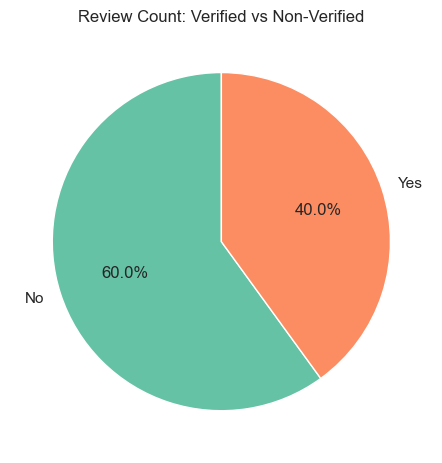

In [482]:
# 7. Are Verified Users More Satisfied Than Non-Verified Ones?

# Distribution of Verified vs Non-Verified Reviews
verified_counts = df['verified_purchase'].value_counts()

# Plotting side-by-side pie charts
plt.figure(figsize=(12, 6))
colors = ['#66c2a5', '#fc8d62']

# Subplot 1: Review count
plt.subplot(1, 2, 1)
verified_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    labels=verified_counts.index,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Review Count: Verified vs Non-Verified')
plt.ylabel('');

In [483]:
# 1. Verified Users Are More Honest / Critical
# Verified users might give more honest and critical feedback.
# They’ve paid or used the product seriously, so they hold it to a higher standard.

# 2. Fake Positive Reviews from Non-Verified Users
# Non-verified reviews might be less authentic or even promotional.
# It's not uncommon to see higher ratings from non-verified users in such cases.

# 3. Expectation Gap
# Verified users might have higher expectations and are disappointed if the product underdelivers.
# Non-verified users may have just tried the product briefly or judged it lightly.

C:\Users\D E L L\AppData\Local\Temp\ipykernel_22100\2251875569.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='review_length', data=df, palette='Blues')


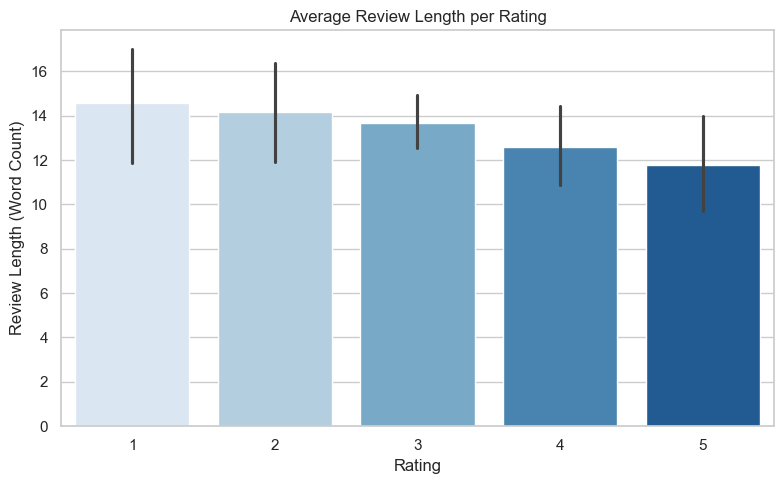

In [484]:
# 8. Average Length of Reviews per Rating Category

# Bar Chart: Average Review Length by Rating
plt.figure(figsize=(8, 5))
sns.barplot(x='rating', y='review_length', data=df, palette='Blues')
plt.title('Average Review Length per Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length (Word Count)')
plt.tight_layout()
plt.show()


In [485]:
# people write longer reviews when they're unhappy and shorter reviews when they are very happy.

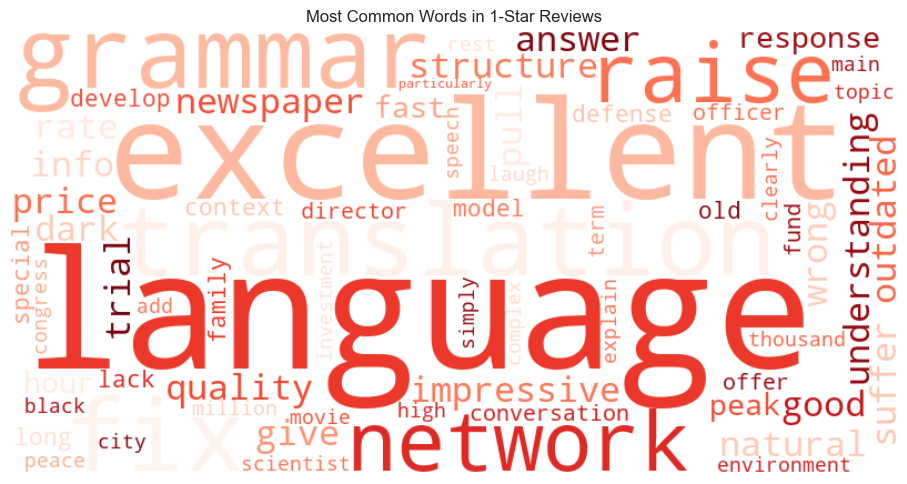

In [486]:
# 9. Most Mentioned Words in 1-Star Reviews

# Filter 1-star reviews
one_star_text = ' '.join(df[df['rating'] == 1]['review'].dropna().astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(one_star_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in 1-Star Reviews')
plt.tight_layout()
plt.show()


In [487]:
#  Spot recurring issues or complaints.

C:\Users\D E L L\AppData\Local\Temp\ipykernel_22100\1045151504.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='version', y='rating', data=version_avg, palette='viridis')


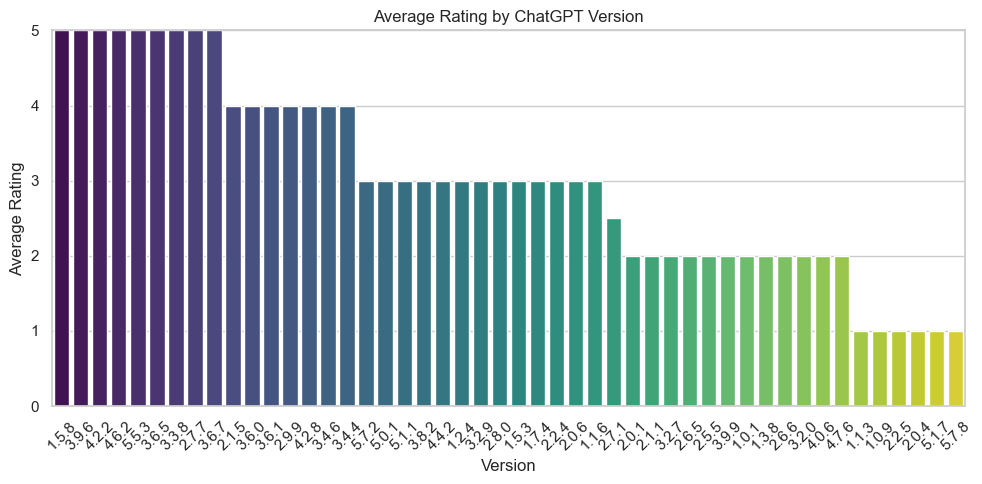

In [488]:
# 10. Which ChatGPT Version Received the Highest Average Rating?

# Group by version and calculate average rating
version_avg = df.groupby('version')['rating'].mean().sort_values(ascending=False).reset_index()

# Bar plot: Versions vs average ratings
plt.figure(figsize=(10, 5))
sns.barplot(x='version', y='rating', data=version_avg, palette='viridis')
plt.title('Average Rating by ChatGPT Version')
plt.xlabel('Version')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.tight_layout()
plt.show()


In [489]:
# Evaluate improvement or regression across updates.

In [490]:
# Sentiment Labeling

def label_sentiment(rating):
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['rating'].apply(label_sentiment)
print(df[['rating', 'sentiment']].head(10))

# Ratings 1 or 2 → 'negative'
# Rating 3 → 'neutral'
# Ratings 4 or 5 (or anything above 3) → 'positive'

   rating sentiment
0       1  negative
1       2  negative
2       5  positive
3       3   neutral
4       1  negative
5       4  positive
6       2  negative
7       3   neutral
8       1  negative
9       2  negative


In [491]:
df.columns

Index(['date', 'title', 'review', 'rating', 'username', 'helpful_votes',
       'review_length', 'platform', 'language', 'location', 'version',
       'verified_purchase', 'detect_language', 'sentiment'],
      dtype='object')

In [492]:
df.to_csv(r'F:\vscode\Chat Gpt\chatgpt_reviews_processed.csv', index=False)

C:\Users\D E L L\AppData\Local\Temp\ipykernel_22100\472746610.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='pastel')


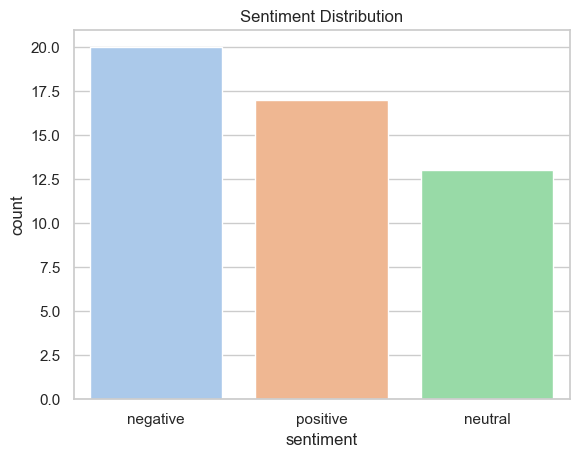

In [493]:
# Count of Each Sentiment
sns.countplot(data=df, x='sentiment', palette='pastel')
plt.title('Sentiment Distribution')
plt.show()

In [494]:
# What is a WordCloud?
# A WordCloud is a visual representation of text data where the size of each word reflects its frequency 
# or importance in the text. The more often a word appears, the bigger and bolder it looks in the cloud. 
# It’s a popular way to get an immediate sense of the most common words in a collection of documents.   

C:\Users\D E L L\AppData\Local\Temp\ipykernel_22100\601868859.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=word_freq.sort_values(by='frequency', ascending=False), x='frequency', y='word', palette='Blues_r')


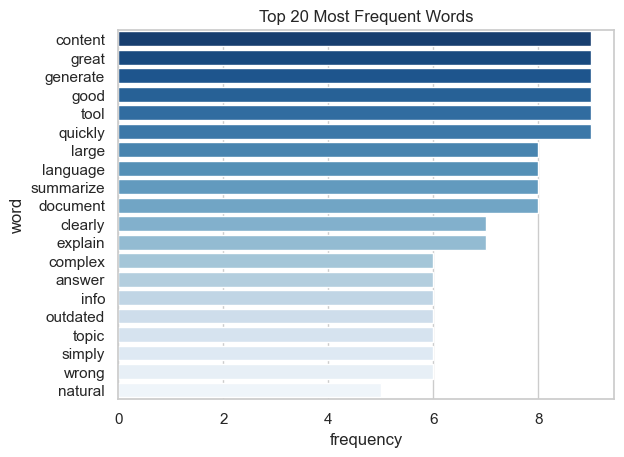

In [495]:
# Most Frequent Words (Histogram)
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['review'])

# Convert to DataFrame
word_freq = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'frequency': X.toarray().sum(axis=0)
})

# Plot
sns.barplot(data=word_freq.sort_values(by='frequency', ascending=False), x='frequency', y='word', palette='Blues_r')
plt.title('Top 20 Most Frequent Words')
plt.show()


In [496]:
df['sentiment'] = df['sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})

In [497]:
#  REFER RECORDING DATE 17.04.2025

In [498]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

# Features and target
X_text = df['review']
y = df['sentiment']

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1,2), stop_words='english')
X_tfidf = tfidf.fit_transform(X_text)

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf.toarray(), y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)


🔹 Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.50      0.67      0.57         6
           2       0.44      0.67      0.53         6

    accuracy                           0.50        18
   macro avg       0.65      0.50      0.46        18
weighted avg       0.65      0.50      0.46        18

Accuracy: 0.5
AUC-ROC Score (OvR): 0.736111111111111


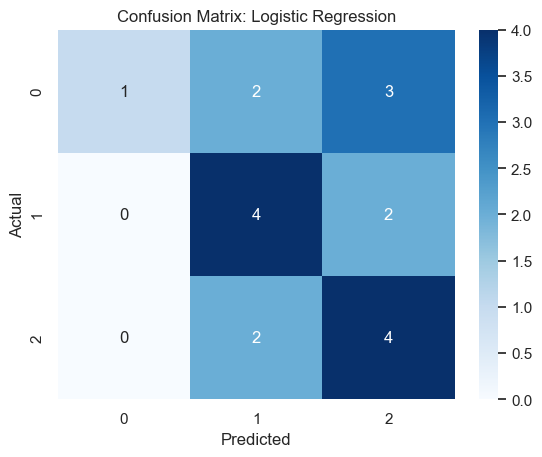

Cross-validation Accuracy Scores: [0.83333333 0.41666667 0.33333333 0.66666667 0.75      ]
Mean CV Accuracy: 0.6

🔹 Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       1.00      0.33      0.50         6
           2       0.36      0.67      0.47         6

    accuracy                           0.50        18
   macro avg       0.65      0.50      0.51        18
weighted avg       0.65      0.50      0.51        18

Accuracy: 0.5
AUC-ROC Score (OvR): 0.75


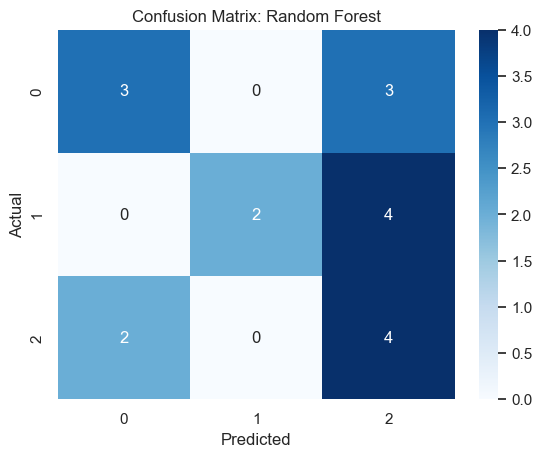

Cross-validation Accuracy Scores: [0.5        0.33333333 0.33333333 0.5        0.75      ]
Mean CV Accuracy: 0.4833333333333333

🔹 Model: Naive Bayes
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.50      0.67      0.57         6
           2       0.44      0.67      0.53         6

    accuracy                           0.50        18
   macro avg       0.65      0.50      0.46        18
weighted avg       0.65      0.50      0.46        18

Accuracy: 0.5
AUC-ROC Score (OvR): 0.7453703703703706


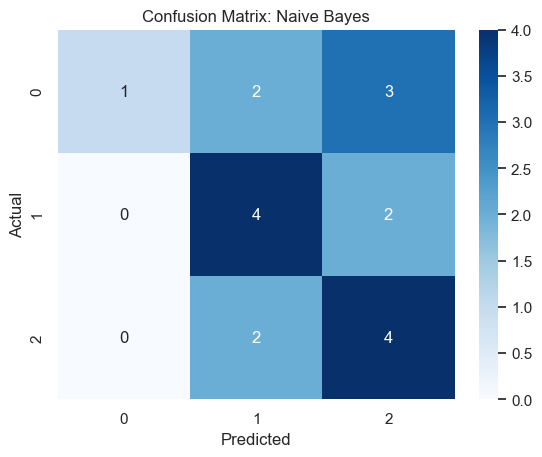

Cross-validation Accuracy Scores: [0.75       0.33333333 0.25       0.58333333 0.75      ]
Mean CV Accuracy: 0.5333333333333333


In [499]:
# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": MultinomialNB()
}

# Loop through models
for name, model in models.items():
    print(f"\n🔹 Model: {name}")
    
    # Fit
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Accuracy
    print("Accuracy:", accuracy_score(y_test, y_pred))
    
    # AUC-ROC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
        auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
        print("AUC-ROC Score (OvR):", auc)
    else:
        print("AUC-ROC not available (model does not support probability prediction)")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # Cross-validation Accuracy
    scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')
    print("Cross-validation Accuracy Scores:", scores)
    print("Mean CV Accuracy:", scores.mean())



🔹 Model: MLPClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.33      1.00      0.50         6
           2       0.00      0.00      0.00         6

    accuracy                           0.33        18
   macro avg       0.11      0.33      0.17        18
weighted avg       0.11      0.33      0.17        18

Accuracy: 0.3333333333333333
AUC-ROC Score (OvR): 0.5


f:\vscode\Chat Gpt\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\vscode\Chat Gpt\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\vscode\Chat Gpt\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


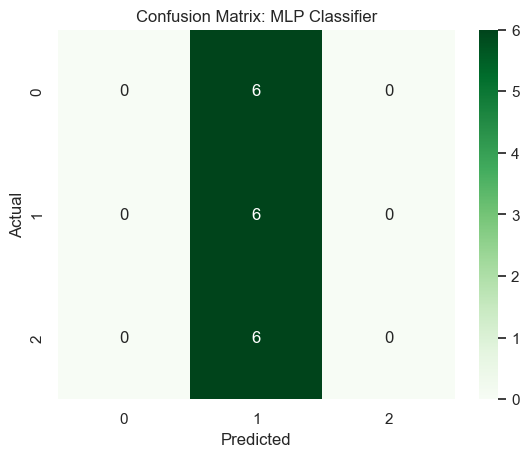

Cross-validation Accuracy Scores: [0.33333333 0.33333333 0.33333333 0.41666667 0.33333333]
Mean CV Accuracy: 0.35


In [500]:
from sklearn.neural_network import MLPClassifier

# Initialize MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64),  # two hidden layers
                          activation='relu',
                          solver='adam',
                          max_iter=300,
                          early_stopping=True,
                          n_iter_no_change=10,
                          validation_fraction=0.1,
                          random_state=42)

print("\n🔹 Model: MLPClassifier")

# Fit the model
mlp_model.fit(X_train, y_train)

# Predict on test set
y_pred_mlp = mlp_model.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_mlp))

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))

# AUC-ROC Score
if hasattr(mlp_model, "predict_proba"):
    y_proba_mlp = mlp_model.predict_proba(X_test)
    auc_mlp = roc_auc_score(y_test, y_proba_mlp, multi_class='ovr')
    print("AUC-ROC Score (OvR):", auc_mlp)
else:
    print("AUC-ROC not available (model does not support probability prediction)")

# Confusion Matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix: MLP Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Cross-validation (optional)
from sklearn.model_selection import cross_val_score
cv_scores_mlp = cross_val_score(mlp_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
print("Cross-validation Accuracy Scores:", cv_scores_mlp)
print("Mean CV Accuracy:", cv_scores_mlp.mean())


In [501]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))


{np.int64(0): np.int64(14), np.int64(1): np.int64(14), np.int64(2): np.int64(14)}


In [502]:
# Logistic Regression

# Best mean cross-validation score → generalizes better
# AUC-ROC is competitive (and quite strong)
# Simple, interpretable, and robust for small datasets

In [503]:
import pickle

# Assuming `model` is your trained LogisticRegression instance
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("✅ Logistic Regression model saved!")



✅ Logistic Regression model saved!


In [504]:
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)  # `tfidf` is your trained TfidfVectorizer
print("✅ TF-IDF vectorizer saved!")


✅ TF-IDF vectorizer saved!
